In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
# Define the functions
def f1(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def f2(x):
    return np.sin(1 / x) if x != 0 else 0

# Define the gradients of the functions
def grad_f1(x, y):
    df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy])

def grad_f2(x):
    return np.cos(1 / x) / (x**2) if x != 0 else 0


In [ ]:
def gradient_descent(x_init, y_init, grad_f, lr, num_iterations):
    x, y = x_init, y_init
    values = []
    start_time = time.time()
    for _ in range(num_iterations):
        grad = grad_f(x, y)
        x = max(min(x - lr * grad[0], 1e10), -1e10)
        y = max(min(y - lr * grad[1], 1e10), -1e10)
        values.append(f1(x, y))
    elapsed_time = time.time() - start_time
    return values, elapsed_time

def stochastic_gradient_descent(x_init, y_init, grad_f, lr, num_iterations):
    x, y = x_init, y_init
    values = []
    start_time = time.time()

    for i in range(num_iterations):
        grad = grad_f(x, y)
        # Update x and y with gradient descent step
        x -= lr * grad[0]
        y -= lr * grad[1]

        x = np.clip(x, -1e10, 1e10)
        y = np.clip(y, -1e10, 1e10)

        value = f1(x, y)

        values.append(value)

    elapsed_time = time.time() - start_time
    return values, elapsed_time

def adam(x_init, y_init, grad_f, lr, num_iterations, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x, y = x_init, y_init
    m, v = np.zeros(2), np.zeros(2)
    values = []
    start_time = time.time()
    for t in range(1, num_iterations + 1):
        grad = grad_f(x, y)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad ** 2)
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        x -= lr * m_hat[0] / (np.sqrt(v_hat[0]) + epsilon)
        y -= lr * m_hat[1] / (np.sqrt(v_hat[1]) + epsilon)
        values.append(f1(x, y))
    elapsed_time = time.time() - start_time
    return values, elapsed_time

def rmsprop(x_init, y_init, grad_f, lr, num_iterations, rho=0.9, epsilon=1e-8):
    x, y = x_init, y_init
    avg_squared_grad = np.zeros(2)
    values = []
    start_time = time.time()
    for _ in range(num_iterations):
        grad = grad_f(x, y)
        avg_squared_grad = rho * avg_squared_grad + (1 - rho) * (grad ** 2)
        x -= lr * grad[0] / (np.sqrt(avg_squared_grad[0]) + epsilon)
        y -= lr * grad[1] / (np.sqrt(avg_squared_grad[1]) + epsilon)
        values.append(f1(x, y))
    elapsed_time = time.time() - start_time
    return values, elapsed_time

def adagrad(x_init, y_init, grad_f, lr, num_iterations, epsilon=1e-8):
    x, y = x_init, y_init
    grad_squared_sum = np.zeros(2)
    values = []
    start_time = time.time()
    for _ in range(num_iterations):
        grad = grad_f(x, y)
        grad_squared_sum += grad ** 2
        x -= lr * grad[0] / (np.sqrt(grad_squared_sum[0]) + epsilon)
        y -= lr * grad[1] / (np.sqrt(grad_squared_sum[1]) + epsilon)
        values.append(f1(x, y))
    elapsed_time = time.time() - start_time
    return values, elapsed_time

In [ ]:
def gd_onevar(x_init, grad_f, lr, num_iterations):
    x = x_init
    values = []
    start_time = time.time();
    for _ in range(num_iterations):
        grad = grad_f(x)
        x -= lr * grad
        values.append(f2(x))
        #values.append(f1(x, y))
    elapsed_time = time.time() - start_time
    return values, elapsed_time

def sgd_onevar(x_init, grad_f, lr, num_iterations):
    x = x_init
    values = []
    start_time = time.time()
    for _ in range(num_iterations):
        grad = grad_f(x)
        x -= lr * grad
        values.append(f2(x))
    elapsed_time = time.time() - start_time
    return values, elapsed_time

def adam_onevar(x_init, grad_f, lr, num_iterations, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x = x_init
    m, v = 0, 0

    values = []
    start_time = time.time()
    for t in range(1, num_iterations + 1):
        grad = grad_f(x)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad ** 2)
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)

        x -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
        values.append(f2(x))
    elapsed_time = time.time() - start_time
    return values, elapsed_time

def rmsp(x_init, grad_f, lr, num_iterations, rho=0.9, epsilon=1e-8):
    x = x_init
    avg_squared_grad = 0
    values = []
    start_time = time.time()
    for _ in range(num_iterations):
        grad = grad_f(x)
        avg_squared_grad = rho * avg_squared_grad + (1 - rho) * (grad ** 2)
        x -= lr * grad / (np.sqrt(avg_squared_grad) + epsilon)
        values.append(f2(x))
    elapsed_time = time.time() - start_time
    return values, elapsed_time

def adagrad_onevar(x_init, grad_f, lr, num_iterations, epsilon=1e-8):
    x = x_init
    grad_squared_sum = 0
    values = []
    start_time = time.time()
    for _ in range(num_iterations):
        grad = grad_f(x)
        grad_squared_sum += grad ** 2
        x -= lr * grad / (np.sqrt(grad_squared_sum) + epsilon)
        values.append(f2(x))
    elapsed_time = time.time() - start_time
    return values, elapsed_time

In [ ]:
# Parameters
lrs = [0.01, 0.05, 0.1]
num_iterations = 1000
x_init, y_init =1,0

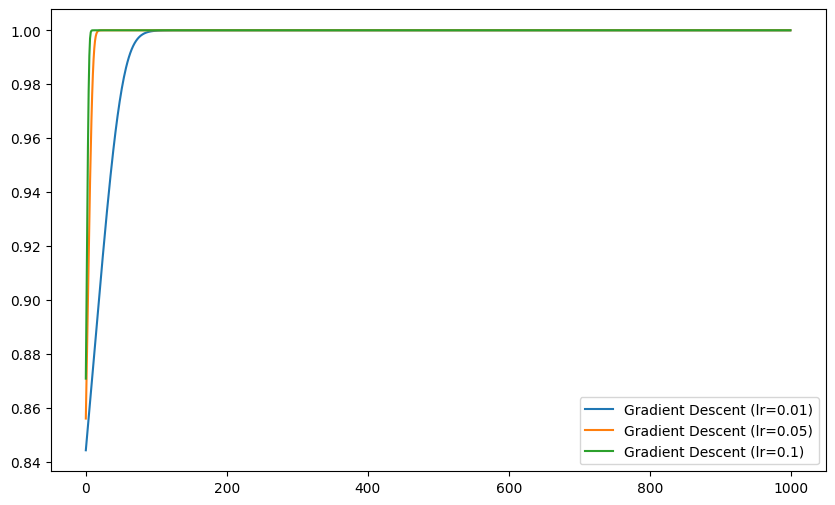

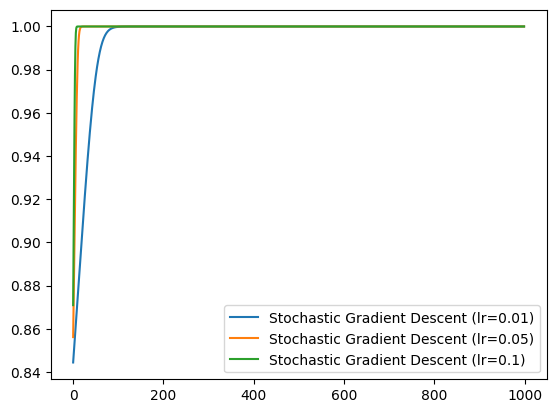

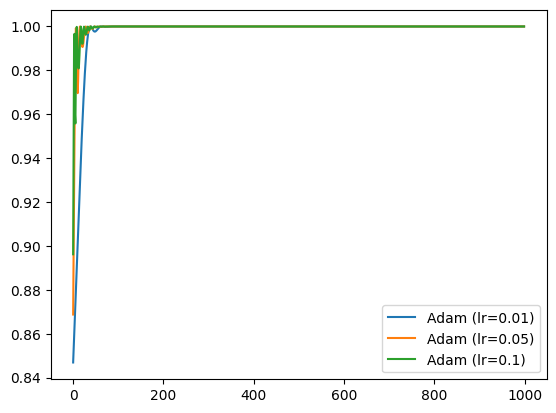

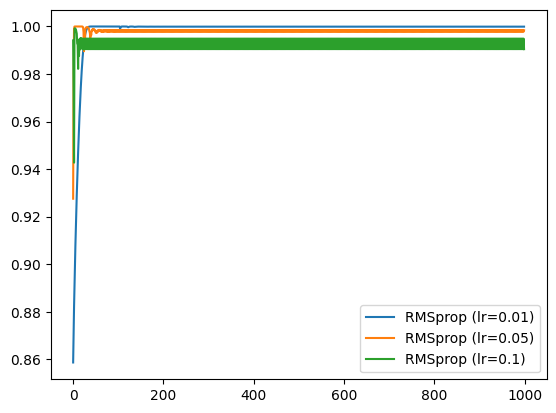

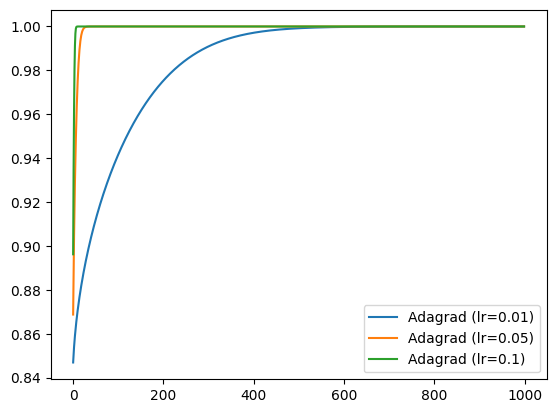

In [ ]:
plt.figure(figsize=(10, 6))

var1func = [(gd_onevar, 'Gradient Descent'), (sgd_onevar, 'Stochastic Gradient Descent'), (adam_onevar, 'Adam'), (rmsp, 'RMSprop'), (adagrad_onevar, 'Adagrad')]
for func in var1func:
    for lr in lrs:
        results, times = func[0](x_init, grad_f2, lr, num_iterations)
        plt.plot(results, label=f'{func[1]} (lr={lr})')

    plt.legend()
    plt.show()

for Gradient Descent


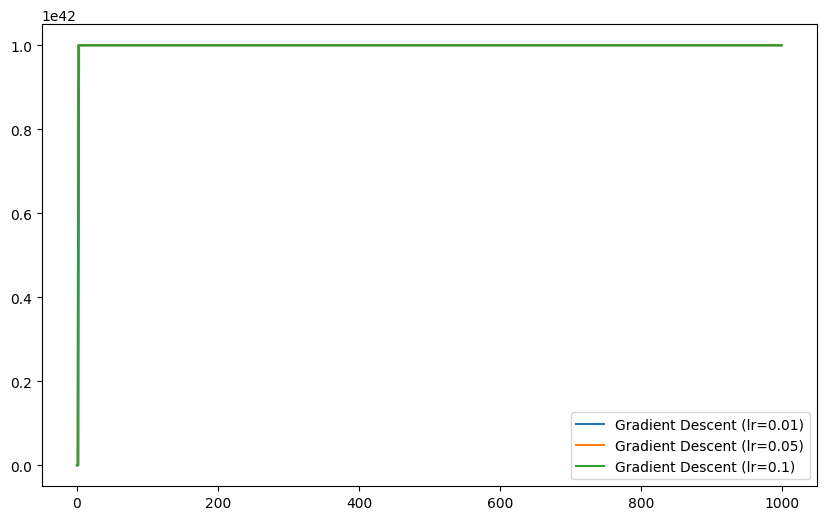

for Stochastic Gradient Descent


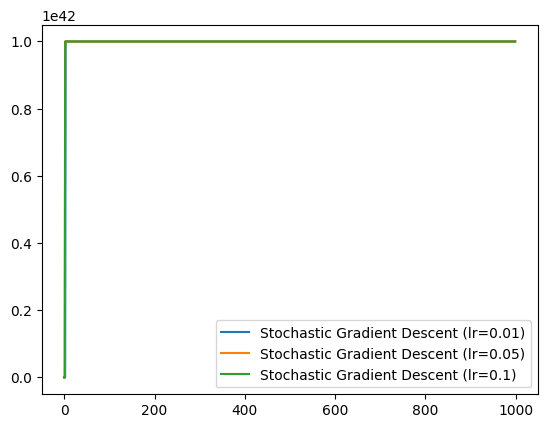

for Adam


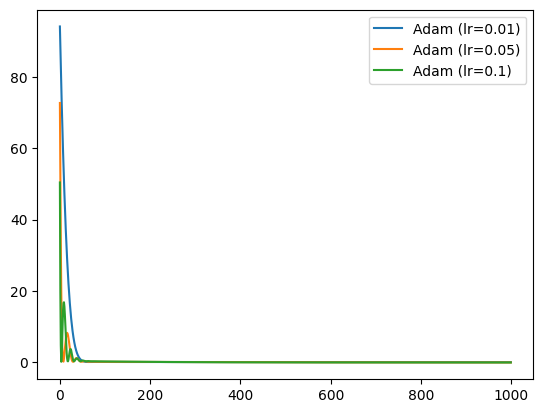

for RMSprop


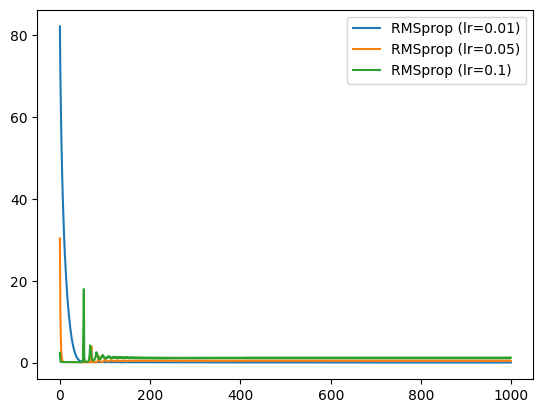

for Adagrad


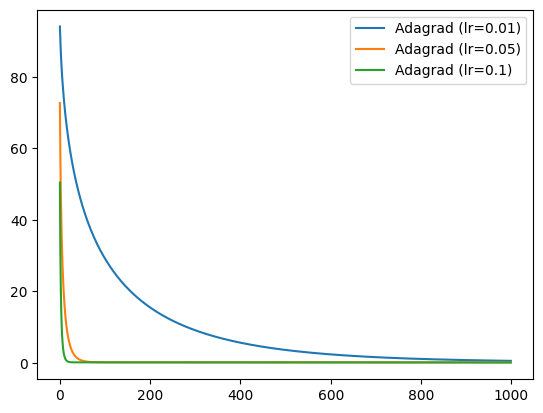

In [ ]:
plt.figure(figsize=(10, 6))
var2func = [(gradient_descent, 'Gradient Descent'), (stochastic_gradient_descent, 'Stochastic Gradient Descent'), (adam, 'Adam'), (rmsprop, 'RMSprop'), (adagrad, 'Adagrad')]
for func in var2func:
    print(f'for {func[1]}')
    for lr in lrs :
        results, times = func[0](x_init, y_init, grad_f1, lr, num_iterations)
        plt.plot(results, label=f'{func[1]} (lr={lr})')

    plt.legend()
    plt.show()

for function f = (1 - x)^2 + 100 * (y - x^2)^2


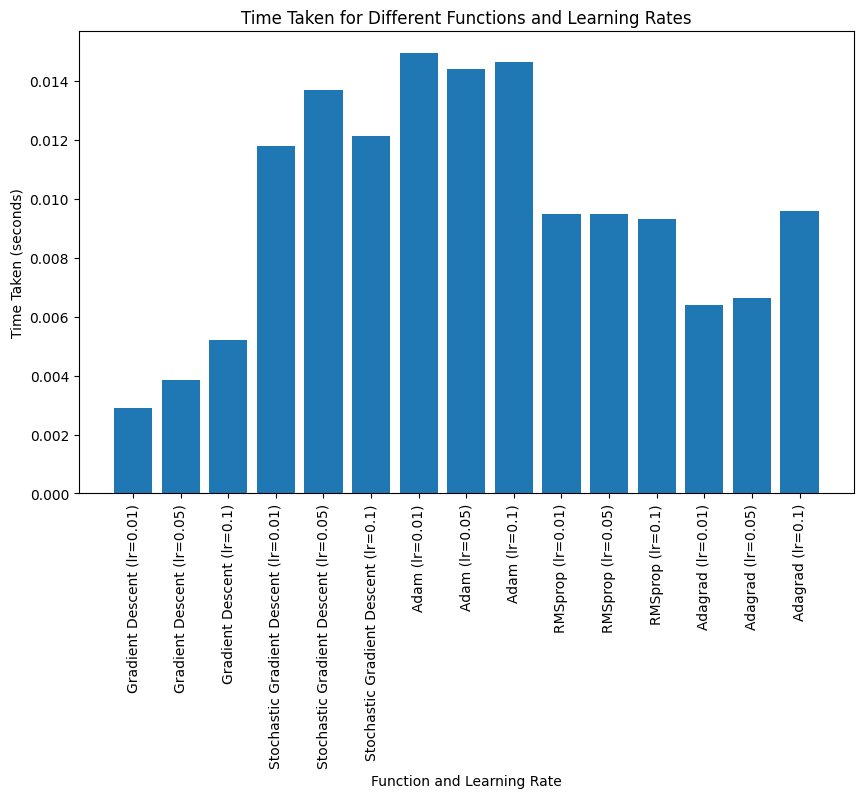

for function f = sin(1/x) if x != 0 else 0


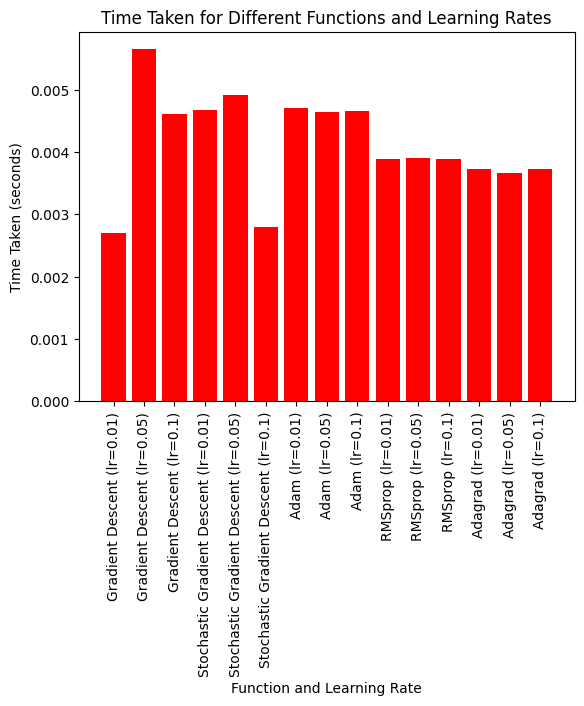

In [ ]:
plt.figure(figsize=(10, 6))

# plot type + lr vs time

time_taken =[]
func_lr = []

for func in var2func:
    for lr in lrs :
        results, times = func[0](x_init, y_init, grad_f1, lr, num_iterations)
        time_taken.append(times)
        func_lr.append(f'{func[1]} (lr={lr})')

print('for function f = (1 - x)^2 + 100 * (y - x^2)^2')
plt.bar(func_lr, time_taken)
plt.xlabel('Function and Learning Rate')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Taken for Different Functions and Learning Rates')
plt.xticks(rotation=90)
plt.show()

time_taken =[]
func_lr = []

for func in var1func :
    for lr in lrs :
        results, times = func[0](x_init, grad_f2, lr, num_iterations)
        time_taken.append(times)
        func_lr.append(f'{func[1]} (lr={lr})')

print('for function f = sin(1/x) if x != 0 else 0')
plt.bar(func_lr, time_taken, color='red')
plt.xlabel('Function and Learning Rate')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Taken for Different Functions and Learning Rates')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Comments on impact:
# The convergence plots for different learning rates help illustrate how the learning rate affects convergence speed and accuracy.
# Typically, a lower learning rate might lead to slower convergence but more precise results, while a higher learning rate might
# converge faster but risk overshooting the optimal point.

# By comparing the convergence plots, we can identify which optimizer performs better under different learning rates for each function.
# The time taken to optimize each function also indicates the computational efficiency of each optimizer.
# From these observations, we can draw conclusions about which optimizer and learning rate combination provides the best balance of speed and accuracy.

Convergence Behavior:

- Plot Interpretation: By visualizing the convergence paths for each optimizer and learning rate, you can observe how well each optimizer navigates the function's landscape. For f1(x, y), the paths should ideally show convergence towards the minimum point, while for f2(x), the focus is on how well the optimizer handles the function's oscillatory nature.
- Learning Rate Impact: Different learning rates affect the convergence speed and accuracy. Generally, too high a learning rate can cause overshooting, while too low can lead to slow convergence. Observing the plots helps in determining the optimal learning rate for each optimizer.


Time Taken:

- Efficiency Comparison: Time taken by each optimizer provides insights into the computational efficiency. Faster convergence is not always better if the final result is not accurate.

Hyperparameter Impact:
-
Learning Rate: The plots show how learning rates influence convergence speed and result accuracy. Optimal learning rates are those where the optimizer converges quickly and accurately.
-
Optimizer Comparison: Comparing different optimizers (GD, SGD, Adam, RMSprop, Adagrad) helps in understanding their relative effectiveness and efficiency.
